In [30]:
import random

In [38]:
print([float(random.random()) for i in range(5)])

[0.9117790223366956, 0.2675803519963411, 0.36266953841707883, 0.28333989802871984, 0.9276931958970448]


In [53]:
l=np.array([float(random.randint(0,50)) for i in range(10)])

In [40]:
print(np.min(l))

-50.0


In [21]:
def softmax(index:int,lista:list)->float:
    sum_value=np.round(np.sum(lista))
    return np.round(lista[index]/sum_value,5)

In [22]:
print(softmax(-1,l))

0.11


In [54]:
results=tf.keras.activations.softmax(l)

In [59]:
results[0]

<tf.Tensor: shape=(), dtype=float64, numpy=7.000929075277183e-21>

In [60]:
results[np.argmax(results)].numpy()

0.6648165855399999

In [56]:
total=0
for i in results:
    total+=i.numpy()

In [57]:
print(total)

0.9999999999999999


In [52]:
np.sum(l)

-104.0

In [18]:
np.array([5,6,34,7,3,6]).shape

(6,)

In [1]:
import cv2

In [103]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

2024-10-18 14:59:23.268078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 14:59:23.281506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 14:59:23.285596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 14:59:23.297136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 14:59:24.024470: W tensorflow/compiler/tf2

In [61]:
from tensorflow.keras import Sequential

In [62]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [63]:
classes=['airplane','automobile','bird','cat','deer',
        'dog','frog','horse','ship','truck']

In [64]:
classes[y_train[1101][0]]

'frog'

In [65]:
import random

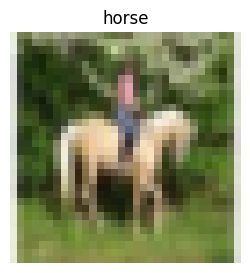

In [66]:
index=random.randint(0,len(X_train)-1)
plt.figure(figsize=(3,3))
plt.imshow(X_train[index])
plt.title(classes[y_train[index][0]])
plt.axis("off")
plt.show()

In [67]:
X_train=X_train/255
X_test=X_test/255

#### X_train.shape

In [77]:
X_val,y_val=X_test[5000:],y_test[5000:]
X_test,y_test=X_test[:5000],y_test[:5000]

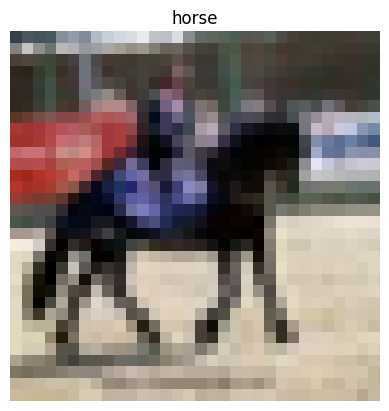

In [21]:
plt.imshow(X_val[0])
plt.axis("off")
plt.title(classes[y_val[0][0]])
plt.show()

In [17]:
classes[y_val[0][0]]

'horse'

In [78]:
model=Sequential()

In [79]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,642 (334.54 KB)

 Trainable params: 85,642 (334.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [76]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


2024-10-18 16:14:42.366626: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3784 - loss: 1.7062
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5796 - loss: 1.1923
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6412 - loss: 1.0300
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6739 - loss: 0.9336
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6959 - loss: 0.8845
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7142 - loss: 0.8206
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7320 - loss: 0.7724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7426 - loss: 0.7370
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7549 - loss: 0.6958
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7681 - loss: 0.6677


In [82]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10


2024-10-18 16:21:28.836786: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3671 - loss: 1.7305 - val_accuracy: 0.5408 - val_loss: 1.2797
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5767 - loss: 1.1980 - val_accuracy: 0.6140 - val_loss: 1.1054
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6420 - loss: 1.0334 - val_accuracy: 0.6354 - val_loss: 1.0509
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6762 - loss: 0.9324 - val_accuracy: 0.6640 - val_loss: 0.9628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6977 - loss: 0.8699 - val_accuracy: 0.6542 - val_loss: 0.9783
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7148 - loss: 0.8201 - val_accuracy: 0.6702 - val_loss: 0.9544
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7340 - loss: 0.7671 - val_accuracy: 0.6860 - val_loss: 0.9063
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7470 - loss: 0.7207 - val_accur

In [83]:
preds=model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [88]:
preds=[np.argmax(i) for i in preds]

In [96]:
preds=np.array(preds).reshape(-1,1)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [98]:
print(accuracy_score(y_test,preds))

0.7168


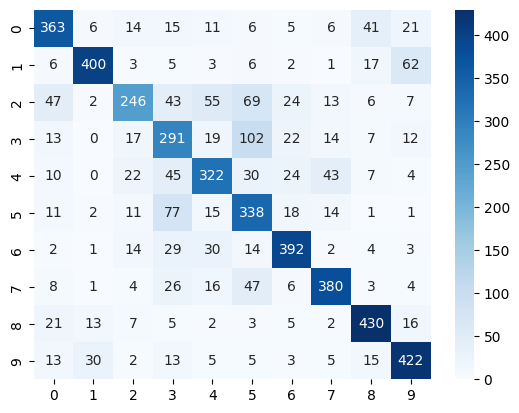

In [104]:
sns.heatmap(confusion_matrix(y_test,preds),annot=True,
           fmt='d',cmap='Blues')
plt.show()

In [109]:
classes[2]

'bird'